In [39]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
xls = pd.ExcelFile('linkedin_job_posts_insights.xlsx')
print(xls.sheet_names)

['Sheet1']


In [3]:
df = pd.read_excel('linkedin_job_posts_insights.xlsx')

In [4]:
print(df.info())          # Summary including data types and nulls
df.head(10)      # First 10 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31597 entries, 0 to 31596
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   job_title        31571 non-null  object        
 1   company_name     30657 non-null  object        
 2   location         31588 non-null  object        
 3   hiring_status    31597 non-null  object        
 4   date             31597 non-null  datetime64[ns]
 5   seniority_level  30289 non-null  object        
 6   job_function     30007 non-null  object        
 7   employment_type  30006 non-null  object        
 8   industry         29586 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 2.2+ MB
None


,job_title,company_name,location,hiring_status,date,seniority_level,job_function,employment_type,industry
0,Store Business Manager - DAVID JONES CHERMSIDE,M.J. Bale,"Brisbane, Queensland, Australia",Be an early applicant,2023-04-13,Not Applicable,Sales and Business Development,Full-time,Government Administration
1,Full-time,Gatesman,"Chicago, IL",Be an early applicant,2023-03-31,NaN,NaN,NaN,NaN
2,Senior Machine Learning Engineer,Redwolf + Rosch,"Adelaide, South Australia, Australia",Be an early applicant,2023-04-25,Mid-Senior level,Engineering and Information Technology,Part-time,Internet Publishing
3,Senior Data Scientist,Bupa,"Melbourne, Victoria, Australia",Be an early applicant,2023-04-29,Entry level,Engineering and Information Technology,Full-time,"Technology, Information and Internet"
4,\n \n Solution Architect\n ...,\n Xybion Digital\n,"\n Chennai, Tamil Nadu, India\n ...",\n Be an early applicant\n,2023-01-26,\n Mid-Senior level\n,\n Engineering and Information Tech...,\n Full-time\n,"\n IT Services and IT Consulting, Sof..."
5,\n \n Lead Data Scientist\n ...,\n Spinny\n,"\n Gurugram, Haryana, India\n ...",\n Actively Hiring\n,2023-02-24,\n Mid-Senior level\n,\n Information Technology\n,\n Full-time\n,\n Advertising Services\n
6,Calling All Data Scientists & Data Analysts,Endeavour Group,"Sydney, New South Wales, Australia",Actively Hiring,2023-03-28,Mid-Senior level,Engineering and Information Technology,Part-time,Internet Publishing
7,Blockchain Engineer,Turing,India,Actively Hiring,2023-03-31,Mid-Senior level,Engineering and Information Technology,Full-time,Financial Services
8,\n \n Senior Software Engine...,\n Squiz\n,"\n Brisbane, Queensland, Australia\...",\n Actively Hiring\n,2023-02-10,\n Mid-Senior level\n,\n Information Technology\n,\n Full-time\n,\n IT Services and IT Consulting\n ...
9,\n \n 项目文员\n \n,\n Highpower International Inc.\n ...,"\n Shenzhen, Guangdong, China\n ...",Actively Hiring,2023-03-01,\n Mid-Senior level\n,\n Information Technology\n,\n \n Employment type\n ...,\n Software Development\n


In [5]:
df.columns = (
    df.columns
    .str.strip()                 # remove leading/trailing spaces
    .str.lower()                 # convert to lowercase
    .str.replace(" ", "_")       # replace spaces with underscores
    .str.replace(r'[^\w\s]', '', regex=True)  # remove special characters (optional)
)

print(df.columns)

Index(['job_title', 'company_name', 'location', 'hiring_status', 'date',
       'seniority_level', 'job_function', 'employment_type', 'industry'],
      dtype='object')


In [6]:
threshold = 0.5
df = df.loc[:, df.isnull().mean() < threshold]

print(f"Remaining columns: {df.columns.tolist()}")
print(f"New shape: {df.shape}")

Remaining columns: ['job_title', 'company_name', 'location', 'hiring_status', 'date', 'seniority_level', 'job_function', 'employment_type', 'industry']
New shape: (31597, 9)


In [11]:
for col in df.select_dtypes(include='object').columns:
    df[col] = (
        df[col]
        .astype(str)
        .apply(lambda x: re.sub(r'[?()\-\[\]]', '', x))         # Remove ?, (, ), -, [, ]
        .apply(lambda x: re.sub(r'\s+', ' ', x.strip()))        # Normalize whitespace
        .str.replace(r'[^\w\s]', '', regex=True)                # Remove other punctuation
        .str.title()                                            # Convert to title case
    )

df.head(10)

,job_title,company_name,location,hiring_status,date,seniority_level,job_function,employment_type,industry
0,Store Business Manager David Jones Chermside,Mj Bale,Brisbane Queensland Australia,Be An Early Applicant,2023-04-13,Not Applicable,Sales And Business Development,Fulltime,Government Administration
1,Fulltime,Gatesman,Chicago Il,Be An Early Applicant,2023-03-31,Nan,Nan,Nan,Nan
2,Senior Machine Learning Engineer,Redwolf Rosch,Adelaide South Australia Australia,Be An Early Applicant,2023-04-25,Midsenior Level,Engineering And Information Technology,Parttime,Internet Publishing
3,Senior Data Scientist,Bupa,Melbourne Victoria Australia,Be An Early Applicant,2023-04-29,Entry Level,Engineering And Information Technology,Fulltime,Technology Information And Internet
4,Solution Architect,Xybion Digital,Chennai Tamil Nadu India,Be An Early Applicant,2023-01-26,Midsenior Level,Engineering And Information Technology,Fulltime,It Services And It Consulting Software Develop...
5,Lead Data Scientist,Spinny,Gurugram Haryana India,Actively Hiring,2023-02-24,Midsenior Level,Information Technology,Fulltime,Advertising Services
6,Calling All Data Scientists Data Analysts,Endeavour Group,Sydney New South Wales Australia,Actively Hiring,2023-03-28,Midsenior Level,Engineering And Information Technology,Parttime,Internet Publishing
7,Blockchain Engineer,Turing,India,Actively Hiring,2023-03-31,Midsenior Level,Engineering And Information Technology,Fulltime,Financial Services
8,Senior Software Engineer Fullstack Reactphpnod...,Squiz,Brisbane Queensland Australia,Actively Hiring,2023-02-10,Midsenior Level,Information Technology,Fulltime,It Services And It Consulting
9,项目文员,Highpower International Inc,Shenzhen Guangdong China,Actively Hiring,2023-03-01,Midsenior Level,Information Technology,Employment Type Fulltime,Software Development


In [13]:
df.dropna(how='all', inplace=True)

# Step 2: Ensure column names are standardized
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 3: Drop rows where job_title is NaN or empty string or just whitespace
df = df[df['job_title'].notna()]
df = df[df['job_title'].str.strip() != '']

# Step 4: Drop rows where job_title is numeric (e.g., "123", "98765")
df = df[~df['job_title'].str.strip().str.fullmatch(r'\d+')]

# Step 5: Drop rows where job_title starts or ends with a number
df = df[~df['job_title'].str.match(r'^\d|.*\d$')]

# Step 6: Reset index
df.reset_index(drop=True, inplace=True)

In [19]:
df['company_name'] = df['company_name'].replace('Nan', 'Unknown')

In [22]:
df['location'] = df['location'].replace('Nan', 'Unknown')

In [25]:
df['seniority_level'] = df['seniority_level'].replace('Nan', 'Other')

In [28]:
df['job_function'] = df['job_function'].replace('Nan', 'Other')

In [31]:
df['employment_type'] = df['employment_type'].replace('Nan', 'Other')

In [32]:
df['industry'] = df['industry'].replace('Nan', 'Unknown')

In [34]:
df.replace('Other', 'Unknown', inplace=True)

In [46]:
df['company_name'] = df['company_name'].replace('Unknown', 'Startup Companies')

In [47]:
df.to_excel("cleaned_job_titles_step.xlsx", index=False)

In [37]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

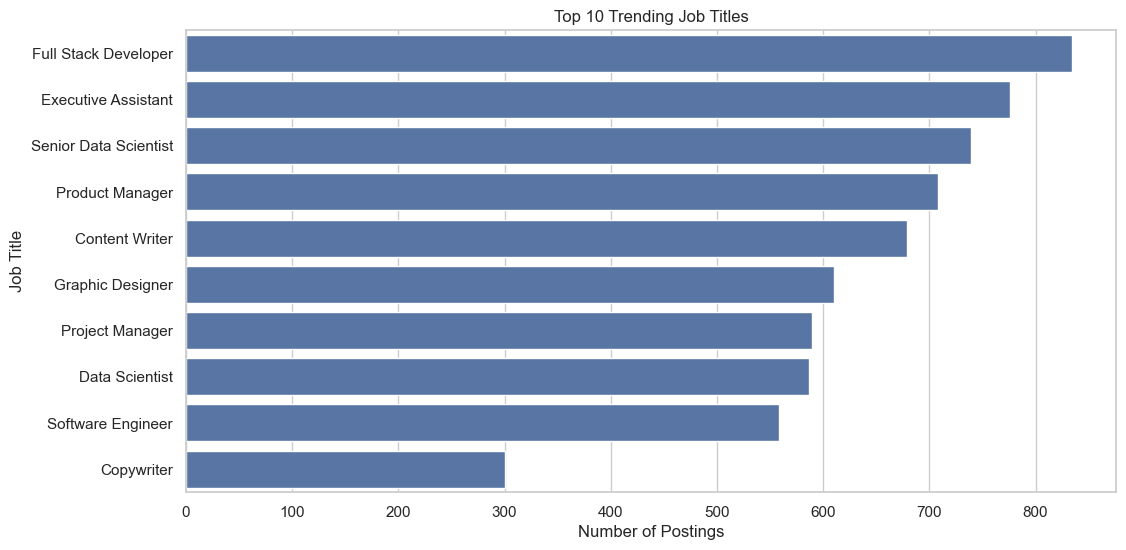

In [41]:
top_roles = df['job_title'].value_counts().head(10).reset_index()
top_roles.columns = ['Job Title', 'Count']

sns.barplot(data=top_roles, y='Job Title', x='Count')
plt.title("Top 10 Trending Job Titles")
plt.xlabel("Number of Postings")
plt.ylabel("Job Title")
plt.show()

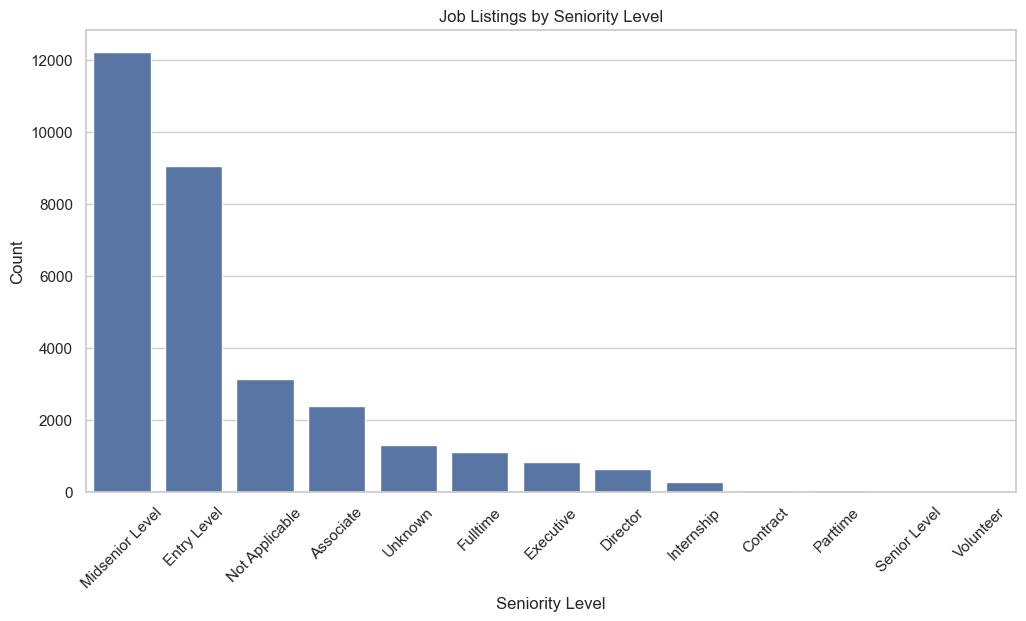

In [42]:
seniority_counts = df['seniority_level'].value_counts().reset_index()
seniority_counts.columns = ['Seniority Level', 'Count']

sns.barplot(data=seniority_counts, x='Seniority Level', y='Count')
plt.xticks(rotation=45)
plt.title("Job Listings by Seniority Level")
plt.show()

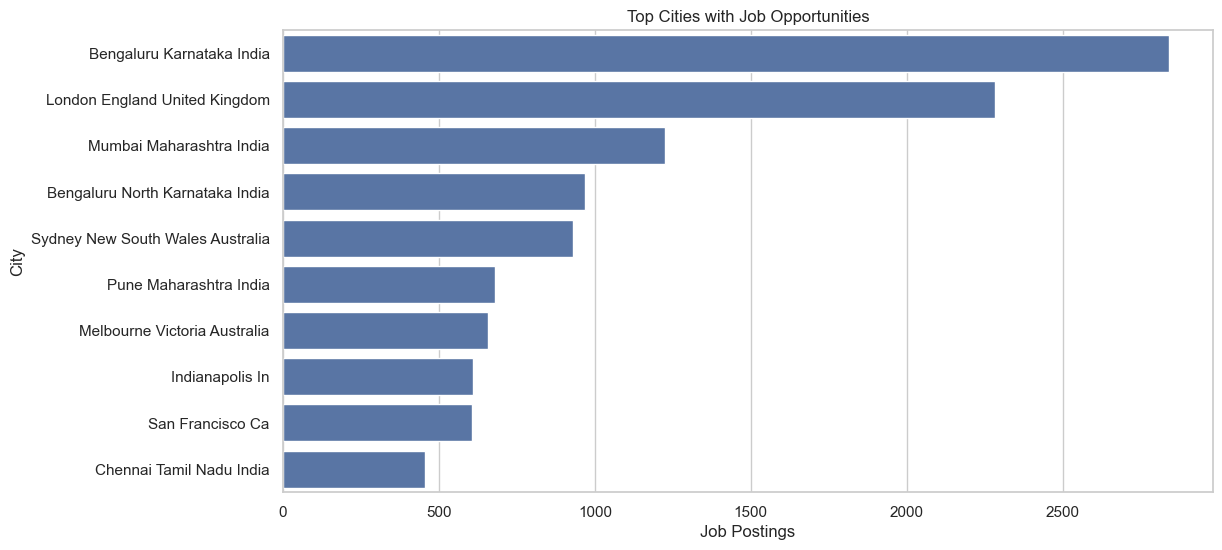

In [44]:
top_cities = df['location'].value_counts().head(10).reset_index()
top_cities.columns = ['City', 'Job Postings']

sns.barplot(data=top_cities, x='Job Postings', y='City')
plt.title("Top Cities with Job Opportunities")
plt.show()

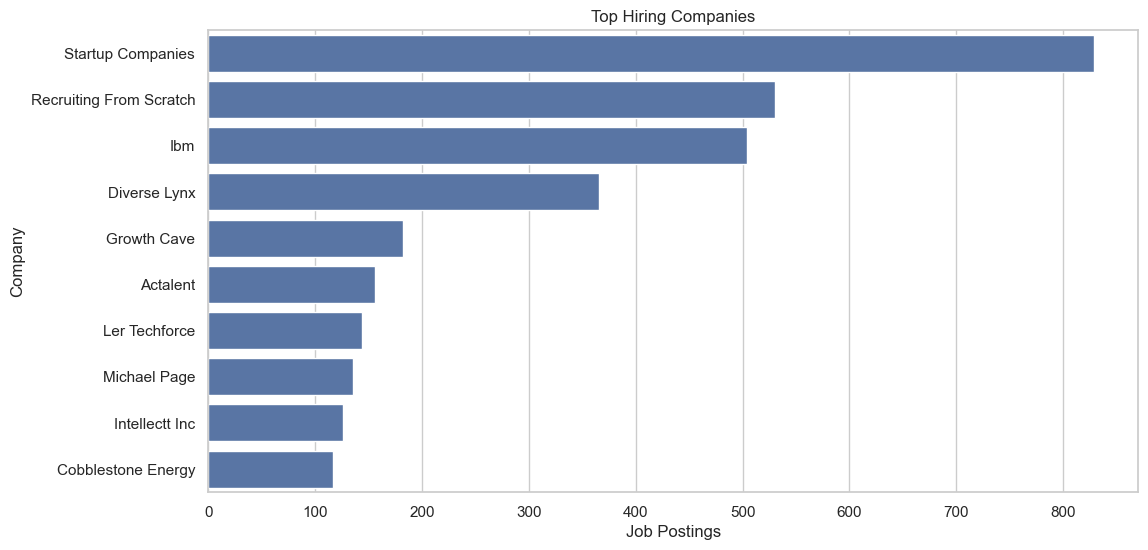

In [48]:
top_companies = df['company_name'].value_counts().head(10).reset_index()
top_companies.columns = ['Company', 'Job Postings']

sns.barplot(data=top_companies, y='Company', x='Job Postings')
plt.title("Top Hiring Companies")
plt.show()